## FP-Growth Method

FP-Growth is an efficient and scalable method for mining the complete set of frequent patterns in a dataset. It's based on the concept of pattern growth and uses a special data structure called a frequent-pattern tree (FP-tree) to store compressed information about frequent patterns.

### Components of FP-Growth

FP-Growth introduces the concept of a frequent pattern set, which contains all elements whose frequency is greater than or equal to a specified minimum support. It uses a divide-and-conquer strategy to find frequent item sets without using candidate generations, thus improving performance.

### How it Works

The FP-Growth algorithm works by first compressing the input database into an FP-tree instance to represent frequent items. It then divides the compressed database into a set of conditional databases, each associated with one frequent pattern. Each database is mined separately. The algorithm reduces the search costs by recursively looking for short patterns and then concatenating them into long frequent patterns.

### Use Cases of FP-Growth

FP-Growth is typically used for association rule mining in various domains such as market basket analysis, web usage mining, intrusion detection, continuous production, and bioinformatics. It's particularly useful in scenarios where there is a need to find frequent patterns or associations in large databases.

### Advantages of FP-Growth

- **Efficiency**: FP-Growth is generally faster than traditional methods like Apriori as it does not involve the generation of candidate sets.
- **Scalability**: It can handle large datasets and high-dimensional data.
- **Compactness**: The FP-tree data structure is more compact than other structures like hash trees and trie, saving memory space.

### Disadvantages of FP-Growth

- **Memory consumption**: Although the FP-tree is more compact, for very large datasets, the FP-tree may not fit into main memory.
- **Complexity**: The algorithm is more complex to understand and implement compared to simpler methods like Apriori.

### Conclusion

FP-Growth is a powerful tool for frequent pattern mining. It's unique in that it uses a pattern growth approach and a special data structure (FP-tree) to efficiently and scalably mine the complete set of frequent patterns. However, like any algorithm, it requires careful tuning and validation to ensure optimal performance. It's also important to note that while FP-Growth is an effective tool for frequent pattern mining, it should be used as part of a broader suite of techniques in a comprehensive data mining strategy.

## Метод FP-Growth

FP-Growth - это эффективный и масштабируемый метод для извлечения полного набора частых шаблонов в наборе данных. Он основан на концепции роста шаблонов и использует специальную структуру данных, называемую деревом частых шаблонов (FP-tree), для хранения сжатой информации о частых шаблонах.

### Компоненты FP-Growth

FP-Growth вводит понятие набора частых шаблонов, который содержит все элементы, частота которых больше или равна указанной минимальной поддержке. Он использует стратегию «разделяй и властвуй» для поиска частых наборов элементов без использования генерации кандидатов, тем самым повышая производительность.

### Как это работает

Алгоритм FP-Growth работает, сначала сжимая входную базу данных в экземпляр FP-tree, чтобы представить частые элементы. Затем он разделяет сжатую базу данных на набор условных баз данных, каждая из которых связана с одним частым шаблоном. Каждая база данных добывается отдельно. Алгоритм сокращает затраты на поиск, рекурсивно ища короткие шаблоны, а затем объединяя их в длинные частые шаблоны.

### Применение FP-Growth

FP-Growth обычно используется для поиска ассоциативных правил в различных областях, таких как анализ корзины покупок, майнинг веб-использования, обнаружение вторжений, непрерывное производство и биоинформатика. Он особенно полезен в сценариях, где требуется найти частые шаблоны или ассоциации в больших базах данных.

### Преимущества FP-Growth

- **Эффективность**: FP-Growth обычно быстрее традиционных методов, таких как Apriori, поскольку он не включает генерацию наборов кандидатов.
- **Масштабируемость**: Он может обрабатывать большие наборы данных и данные высокой размерности.
- **Компактность**: Структура данных FP-tree более компактна, чем другие структуры, такие как хеш-деревья и trie, что позволяет экономить память.

### Недостатки FP-Growth

- **Потребление памяти**: Несмотря на то, что FP-tree более компактен, для очень больших наборов данных FP-tree может не поместиться в основной памяти.
- **Сложность**: Алгоритм более сложен для понимания и реализации по сравнению с более простыми методами, такими как Apriori.

### Заключение

FP-Growth - это мощный инструмент для поиска частых шаблонов. Он уникален тем, что использует подход роста шаблонов и специальную структуру данных (FP-tree) для эффективного и масштабируемого извлечения полного набора частых шаблонов. Однако, как и любой алгоритм, он требует тщательной настройки и проверки для обеспечения оптимальной производительности. Также важно отметить, что, хотя FP-Growth является эффективным инструментом для поиска частых шаблонов, он должен использоваться как часть более широкого набора техник в комплексной стратегии поиска данных.

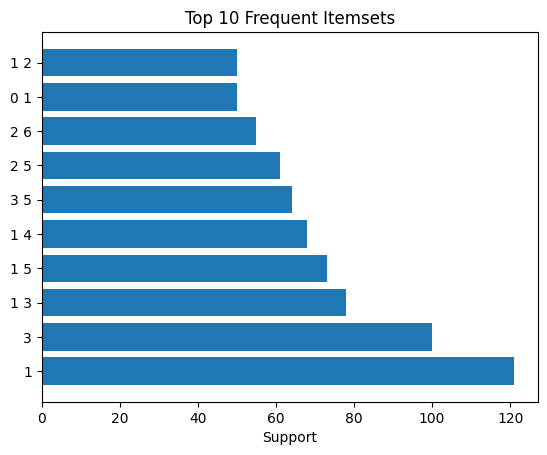

In [3]:
try:
    from sklearn.datasets import load_iris
    import pyfpgrowth
    import matplotlib.pyplot as plt
except ImportError:
    !pip install scikit-learn pyfpgrowth matplotlib

class FPGrowthModel:
    """
    A class used to represent an FP-Growth Model.

    ...

    Attributes
    ----------
    min_support : int
        The minimum support for an itemset to be identified as frequent.
    transactions : list of lists
        The transactions data.

    Methods
    -------
    load_data():
        Loads the Iris data.
    find_frequent_patterns():
        Finds the frequent itemsets in the transactions data.
    generate_association_rules(threshold):
        Generates the association rules from the frequent itemsets.
    plot_frequent_patterns(N):
        Plots the top N frequent itemsets.
    """

    def __init__(self, min_support=10):
        """
        Constructs all the necessary attributes for the FPGrowthModel object.
        """

        self.min_support = min_support
        self.transactions = []

    def load_data(self):
        """Loads the Iris data."""

        iris = load_iris()
        # Convert continuous data into discrete by converting each value to an integer
        self.transactions = iris.data.astype(int).tolist()

    def find_frequent_patterns(self):
        """Finds the frequent itemsets in the transactions data."""

        self.patterns = pyfpgrowth.find_frequent_patterns(self.transactions, self.min_support)

    def generate_association_rules(self, threshold=0.3):
        """Generates the association rules from the frequent itemsets."""

        self.rules = pyfpgrowth.generate_association_rules(self.patterns, threshold)

    def plot_frequent_patterns(self, N):
        """Plots the top N frequent itemsets."""

        # Sort the patterns by support and select the top N
        top_patterns = sorted(self.patterns.items(), key=lambda x: x[1], reverse=True)[:N]
        patterns, supports = zip(*top_patterns)

        # Convert the patterns to string for plotting
        pattern_strings = [' '.join(map(str, pattern)) for pattern in patterns]

        plt.barh(pattern_strings, supports)
        plt.xlabel('Support')
        plt.title('Top {} Frequent Itemsets'.format(N))
        plt.show()

# Example usage:
fp_growth_model = FPGrowthModel()
fp_growth_model.load_data()
fp_growth_model.find_frequent_patterns()
fp_growth_model.generate_association_rules()
fp_growth_model.plot_frequent_patterns(10)


The plot visualizes the top 10 frequent itemsets discovered by the FP-Growth algorithm in the Iris dataset. Each bar in the plot represents a frequent itemset, and the length of the bar represents the support of the itemset, which is the number of transactions that contain the itemset. The itemsets are represented as strings of integers, where each integer corresponds to a discretized feature value from the Iris dataset. The itemsets are sorted by support, so the itemset with the highest support is at the top of the plot. This visualization can help you understand which itemsets are most common in the dataset. Please note that the actual interpretation of the itemsets depends on the meaning of the feature values in the Iris dataset.

Диаграмма визуализирует 10 наиболее частых наборов элементов, обнаруженных алгоритмом FP-Growth в наборе данных Iris. Каждый столбец на диаграмме представляет собой частый набор элементов, а длина столбца представляет поддержку набора элементов, которая является количеством транзакций, содержащих набор элементов. Наборы элементов представлены в виде строк целых чисел, где каждое целое число соответствует дискретизированному значению признака из набора данных Iris. Наборы элементов отсортированы по поддержке, поэтому набор элементов с наибольшей поддержкой находится в верхней части диаграммы. Эта визуализация может помочь вам понять, какие наборы элементов наиболее распространены в наборе данных. Обратите внимание, что фактическая интерпретация наборов элементов зависит от значения признаков в наборе данных Iris.